# Demographics

## Importing Packages and Data

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the raw data
path = "./2023-cleaned-survey.xlsx"
df = pd.read_excel(path)
df.head()

,Time of Response,Postal Code,Describe Your Location,Identified Gender,Age,Select Your Race/Ethnicity,Identify Membership in Given Populations,Describe Your Primary Role in Creative Sector,Primary Creative Activity,Years of Professional Creative Practice,...,Did you know The Non-Profit offers free legal and professional services to eligible artists and arts organizations in The Area through our VLPA program?,"If so, have you ever used the VLPA's legal or business services?",Are you considering using the VLPA's free legal or business services in the future?,"If not, could you share your reasons?.1",Do you plan to remain in The Area for more than the next 2-3 years?,"If you're undecided or planning to leave, why? (Select all that apply)",Any other comments on your reasons for staying in or departing from The Area's creative ecosystem?,What three words come to mind when you think of the Arts & Business Council of Greater Nashville?,"Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:",Feel free to share any additional insights about The Non-Profit or The Area's Creative Economy not covered in this survey:
0,2023-05-01 03:25:24.187,37721,Urban,Prefer not to say,Older Adults (Age 65+),Hispanic or Latinx,K-12 Students,"Creative Worker (In-house graphic designers, c...",NaN,NaN,...,Yes,No,Maybe,NaN,NaN,My reason is not related to my artistic practice,The Area has given me both challenges and rewa...,"Thrive, Engage, Motivate",Online platform for showcasing local talent.,NaN
1,2023-05-01 03:38:28.091,31291,Suburban,Female,Children/Youth (Age 0-18),Asian,Individuals living in neighborhoods with limit...,"Arts Administrator (Theater managers, developm...",NaN,NaN,...,No,Yes,Yes,NaN,"No, I am retiring soon.",Perceived lack of accessible artistic/creative...,Personal and professional growth are my main r...,NaN,Counseling services for artists.,Ensuring artists receive fair compensation is ...
2,2023-05-01 03:53:54.634,38155,Urban,Female,Adults (Age 25-64),Prefer not to say,NaN,"Arts Funder (Foundations; national, state, and...",NaN,NaN,...,No,No,Maybe,NaN,NaN,Perceived lack of artistic support from the city,NaN,"Resourceful, Advocate, Partner",NaN,Feedback mechanisms for artists and stakeholde...
3,2023-05-01 06:32:42.548,39888,Rural,Prefer not to say,Prefer not to say,Prefer not to say,New Americans (immigrants and refugees)*,"Business Professional (Attorneys, bankers, CPA...",NaN,NaN,...,No,Yes,Yes,NaN,"No, Im considering relocating for better oppor...",My reason is not related to my artistic practice,NaN,NaN,NaN,NaN
4,2023-05-01 08:17:28.339,30154,Urban,Male,Adults (Age 25-64),Hispanic or Latinx,K-12 Students,Civic and/or Social Service Worker (Social wor...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Who has taken the survey? (with figures)

### Gender

In [3]:
genders = {
    'Prefer not to say': 'N/A',
    'Female': 'F',
    'Male': 'M',
    'Non-binary': 'NB',
}

df['Identified Gender'] = df['Identified Gender'].replace(genders)

df['Identified Gender'] = pd.Categorical(df['Identified Gender'], categories=['N/A', 'F', 'M', 'NB'])

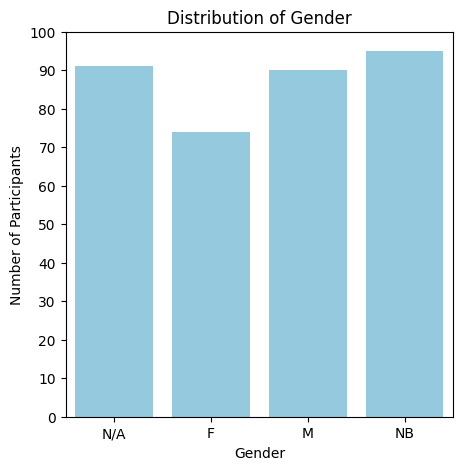

In [4]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x=df['Identified Gender'], color='skyblue')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.yticks(np.arange(0, 110, 10))
plt.ylabel('Number of Participants')
plt.show()


There's a relatively balanced distribution across gender identities.

### Age

In [5]:
age_ranges = {
    'Older Adults (Age 65+)': '65+',
    'Children/Youth (Age 0-18)': '0-18',
    'Adults (Age 25-64)': '25-64',
    'Prefer not to say': 'N/A',
    'Young Adults (Age 19-24)': '19-24'
}

df['Age'] = df['Age'].replace(age_ranges)
df['Age'] = pd.Categorical(df['Age'], categories=['0-18', '19-24', '25-64', '65+', 'N/A'], ordered=True)

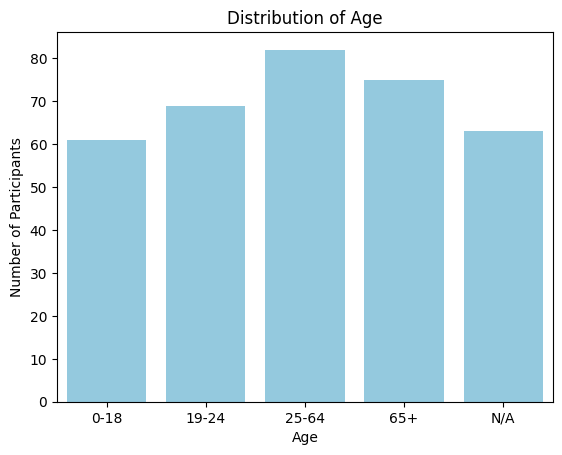

In [6]:
sns.countplot(data=df, x=df['Age'], color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()

The age distribution is fairly even, but there are more adults (25-64) and older adults (65+) compared to other groups.

## Which questions are answered by which roles, and how many respondents are there to each question (with figure)

In [7]:
membership_populations = {
    'K-12 Students': 'K-12 Students',
    'Individuals living in neighborhoods with limited access to the arts': 'Limited Access to Arts',
    'New Americans (immigrants and refugees)*': 'New Americans',
    'Military Veterans/Active Duty Personnel': 'Military',
    'Individuals with disabilities': 'Disabled',
    'Individual who is currently incarcerated': 'Incarcerated',
    'Individuals with Limited English Proficiency': 'Limited English Proficiency',
    'LGBTQI+ Individuals': 'LGBTQI+',
    'Prefer not to say': "None",
    'Individuals living in hospitals': 'Hospitalized',
    'People of Color (American Indian/Alaska Native': 'People of Color'
}

df['Identify Membership in Given Populations'] = df['Identify Membership in Given Populations'].replace(membership_populations)

In [8]:
primary_fields = {
    'Creative Worker (In-house graphic designers, copywriters, art directors employed at a business working in the creative industries)': 'Creative Worker',
    'Arts Administrator (Theater managers, development staff, executive directors, program coordinators at an arts-based business usually a non-profit, e.g., at a museum, symphony, theater, etc.)': 'Arts Administrator',
    'Arts Funder (Foundations; national, state, and local arts agencies)': 'Arts Funder',
    'Business Professional (Attorneys, bankers, CPAs, other professionals working in small to large businesses outside of the creative industries)': 'Business Professional',
    'Civic and/or Social Service Worker (Social worker, government employee, NGO working outside the arts)': 'Civic/Social Service Worker',
    'Creative Entrepreneurs (Artists, performers, makers, creatives of all disciplines, self-employed)': 'Creative Entrepreneur',
    'Arts Educator or Teaching Artist (Art teachers, music teachers, teaching artists, dance teachers, visiting artists)': 'Arts Educator/Teaching Artist'
}

df['Describe Your Primary Role in Creative Sector'] = df['Describe Your Primary Role in Creative Sector'].replace(primary_fields)

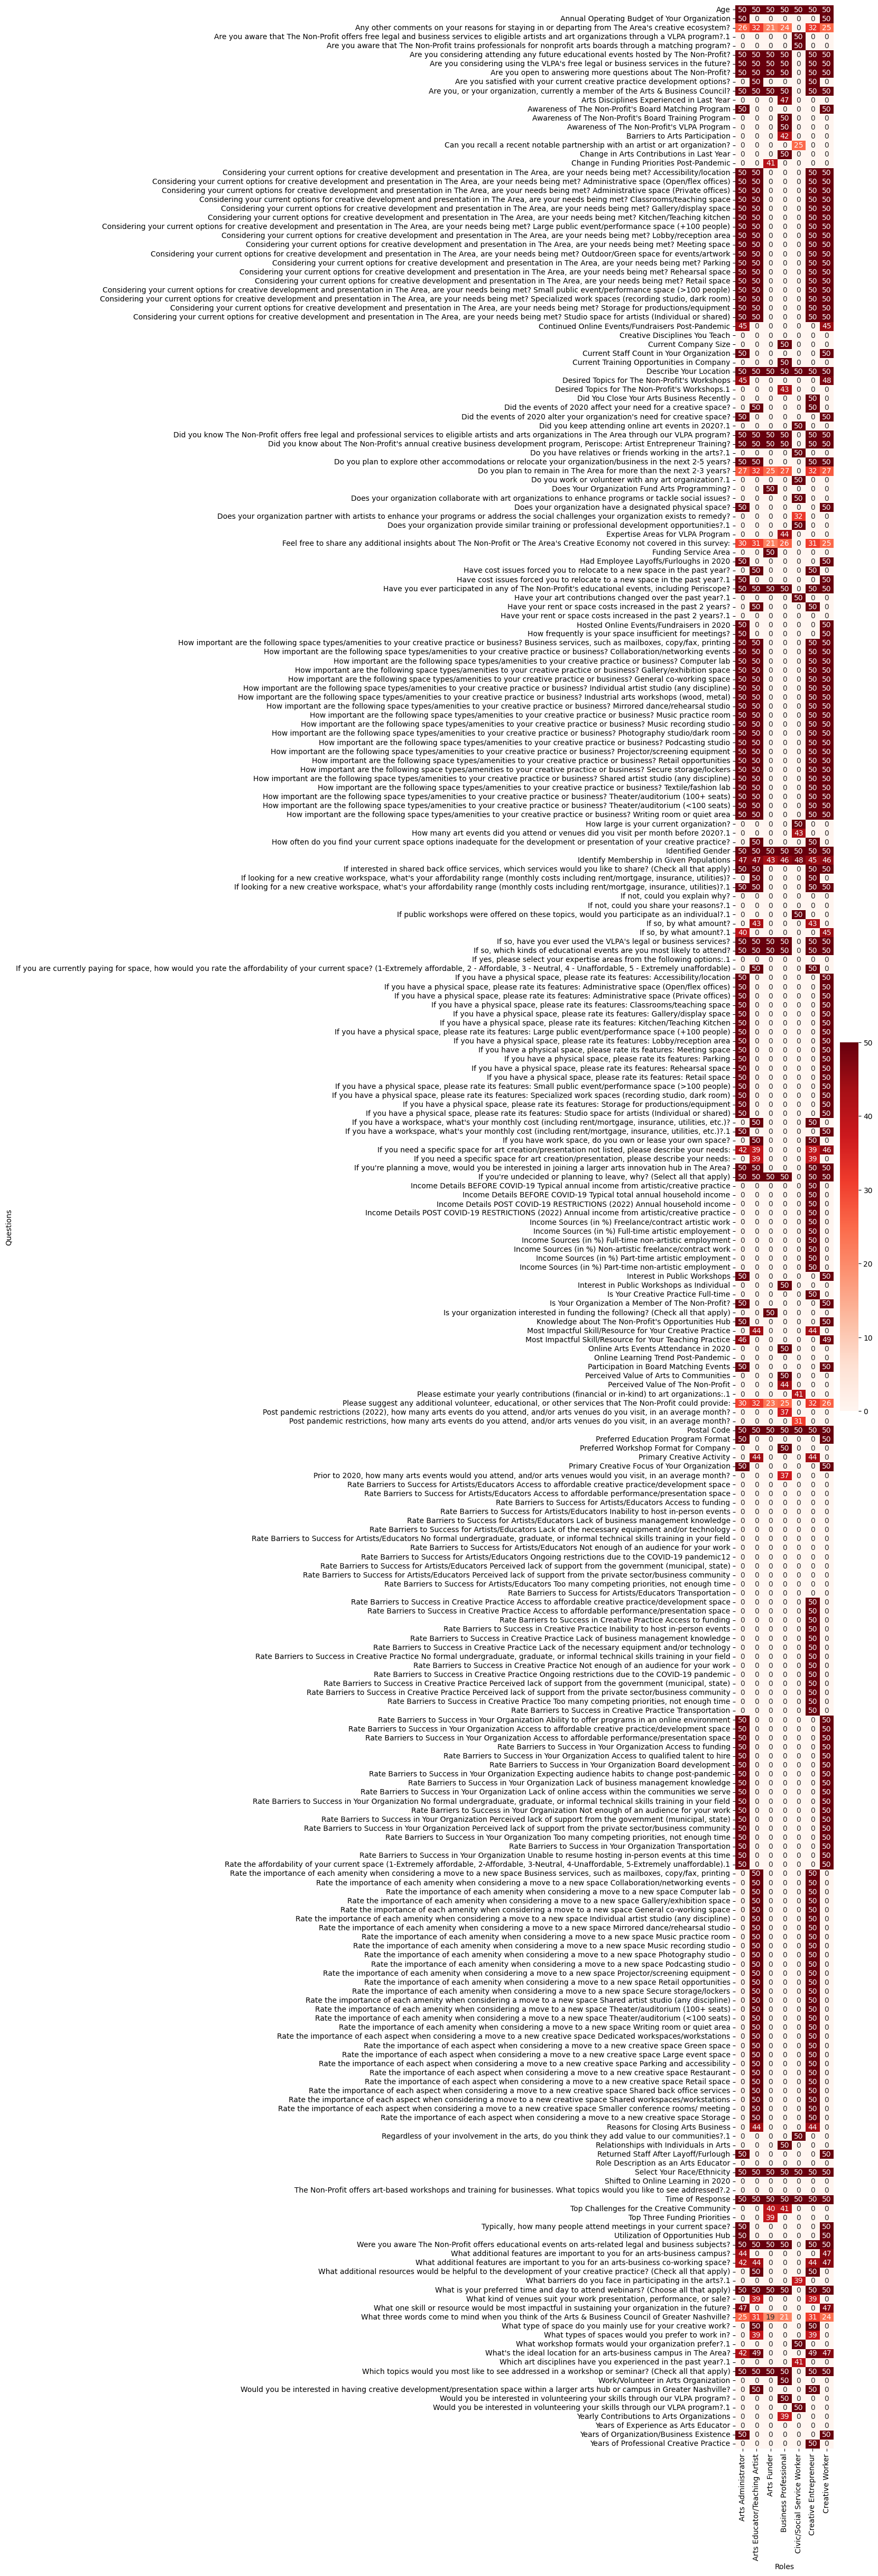

In [9]:
plt.figure(figsize=(3, 60))
pivot_table = pd.pivot_table(df, index='Describe Your Primary Role in Creative Sector', aggfunc=lambda x: x.notnull().sum())
pivot_table = pivot_table.T # swap x and y axis
sns.heatmap(pivot_table, cmap='Reds', annot=True, fmt='g')
plt.xlabel('Roles') # swap x and y axis labels
plt.ylabel('Questions')

plt.show()


The above heatmap shows the number of respondents to each question, broken down by role. The darker the color, the more respondents there are to that question. The questions are ordered by the number of respondents, from most to least.

## In looking at the percentage of respondents based on demographics, how representative of each population do you think the results will be? In other words, by what decomposition does it seem that the data is actionable? (i.e., If the survey has 2 Funders, do you think the business should make conclusions based on the results from the findings of funders in the surveys?)

### Race/Ethnicity

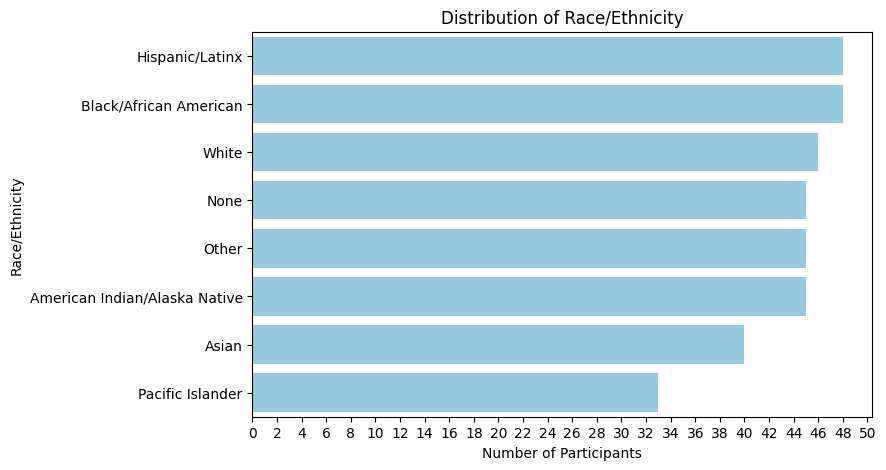

In [10]:
df['Select Your Race/Ethnicity'] = df['Select Your Race/Ethnicity'].replace({
    'Hispanic or Latinx': 'Hispanic/Latinx',
    'Native Hawaiian or Other Pacific Islander': 'Pacific Islander',
    'Black or African American': 'Black/African American', 
    'Prefer not to say': "None"
})
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Select Your Race/Ethnicity', color='skyblue', orient='h', order=df['Select Your Race/Ethnicity'].value_counts().index)
plt.title('Distribution of Race/Ethnicity')
plt.xlabel('Number of Participants')
plt.ylabel('Race/Ethnicity')
plt.xticks(np.arange(0, 51, 2))
plt.show()


The above bar plot shows the number of participants for each race/ethnicity. We can see that the distribution is fairly even. 

### Location

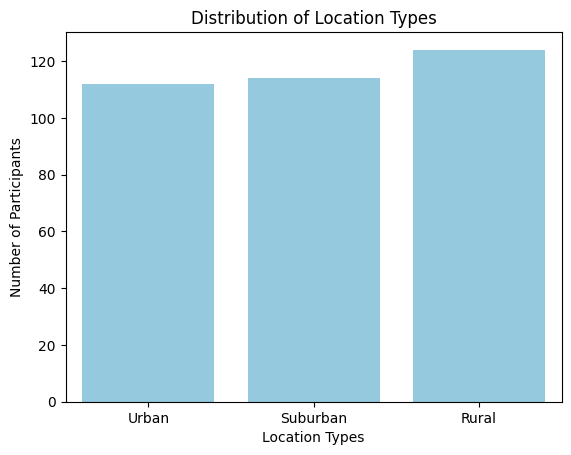

In [11]:
sns.countplot(data=df, x='Describe Your Location', color='skyblue')
plt.title('Distribution of Location Types')
plt.xlabel('Location Types')
plt.ylabel('Number of Participants')
plt.show()

The above bar plot shows the number of participants for each location type. We can see that there is a fairly even distribution among urban, suburban, and rural respondents.

### Considering the distribution for our dataset is mostly even across gender, age, race/ethnicity, we can conclude that this dataset would be fairly representative for each demographic groups. 

### Additional demographic decompisitions

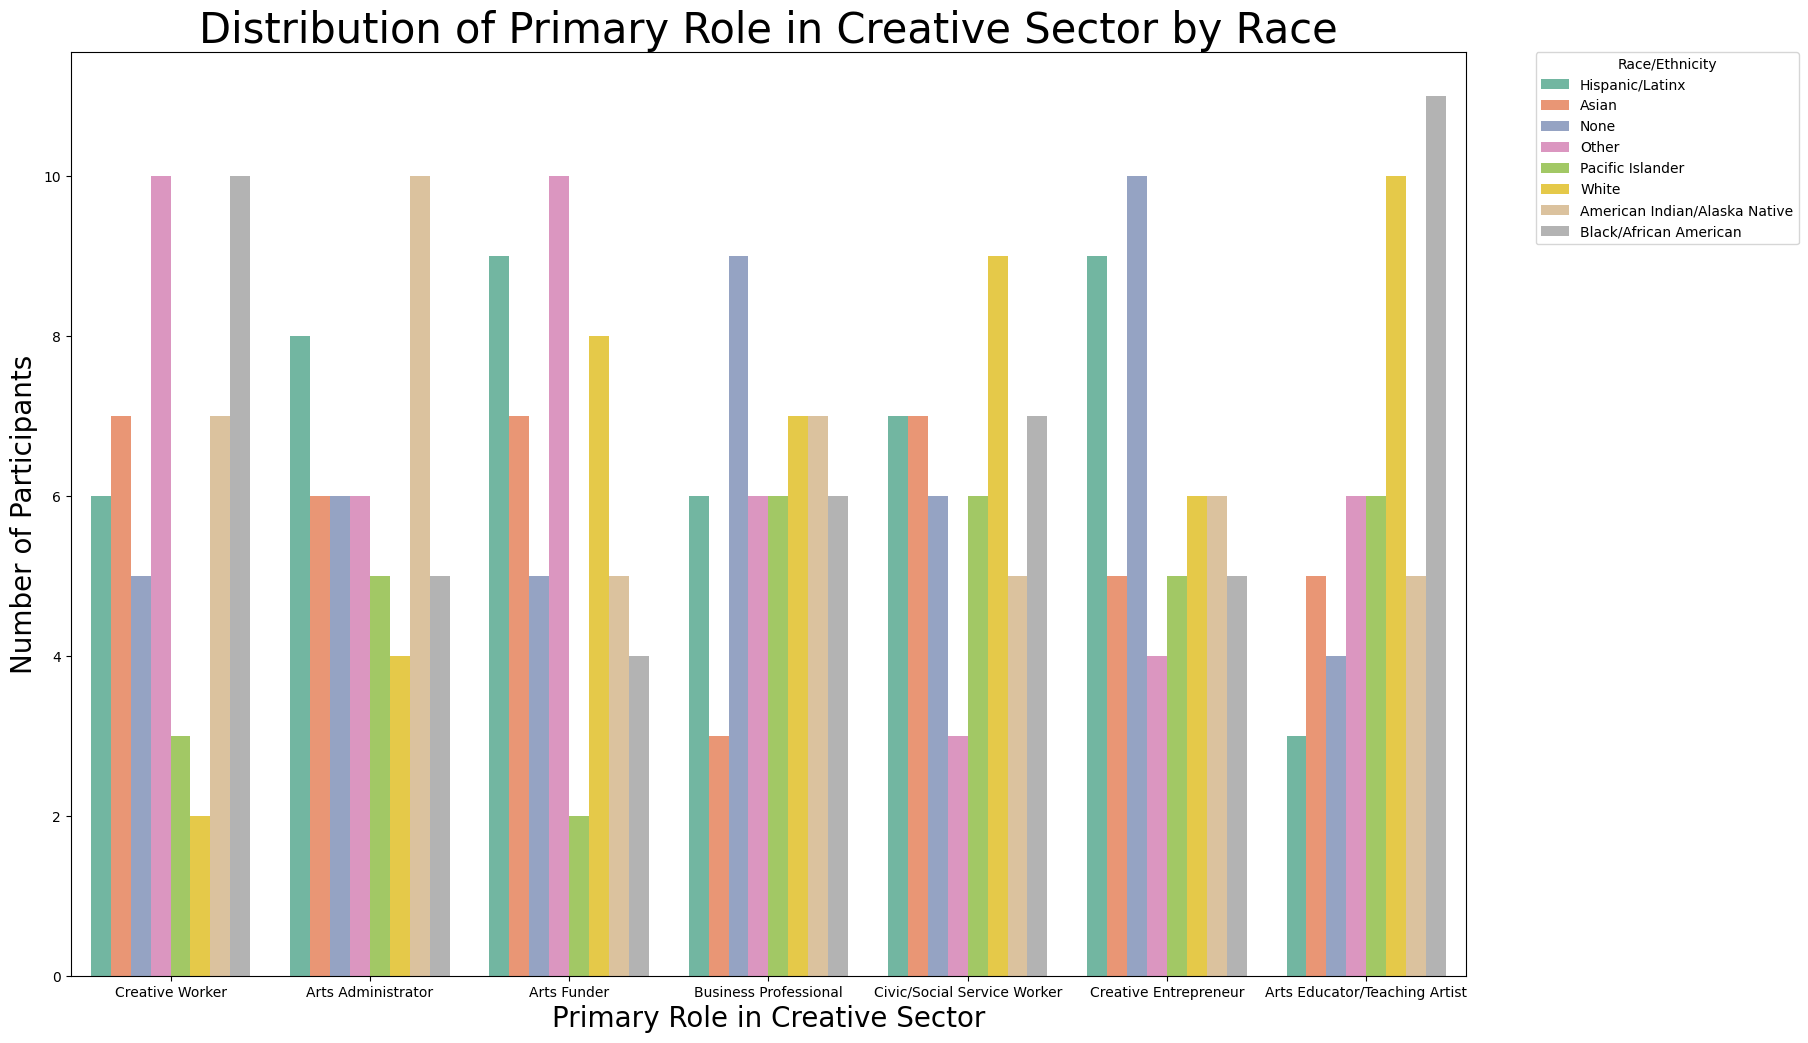

In [12]:
plt.figure(figsize=(18, 12))
plot = sns.countplot(data=df, x='Describe Your Primary Role in Creative Sector', orient='h', hue='Select Your Race/Ethnicity', palette='Set2')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title('Race/Ethnicity')
plt.title('Distribution of Primary Role in Creative Sector by Race', fontsize=30)
plt.xlabel('Primary Role in Creative Sector', fontsize=20)
plt.ylabel('Number of Participants', fontsize=20)
plt.show()

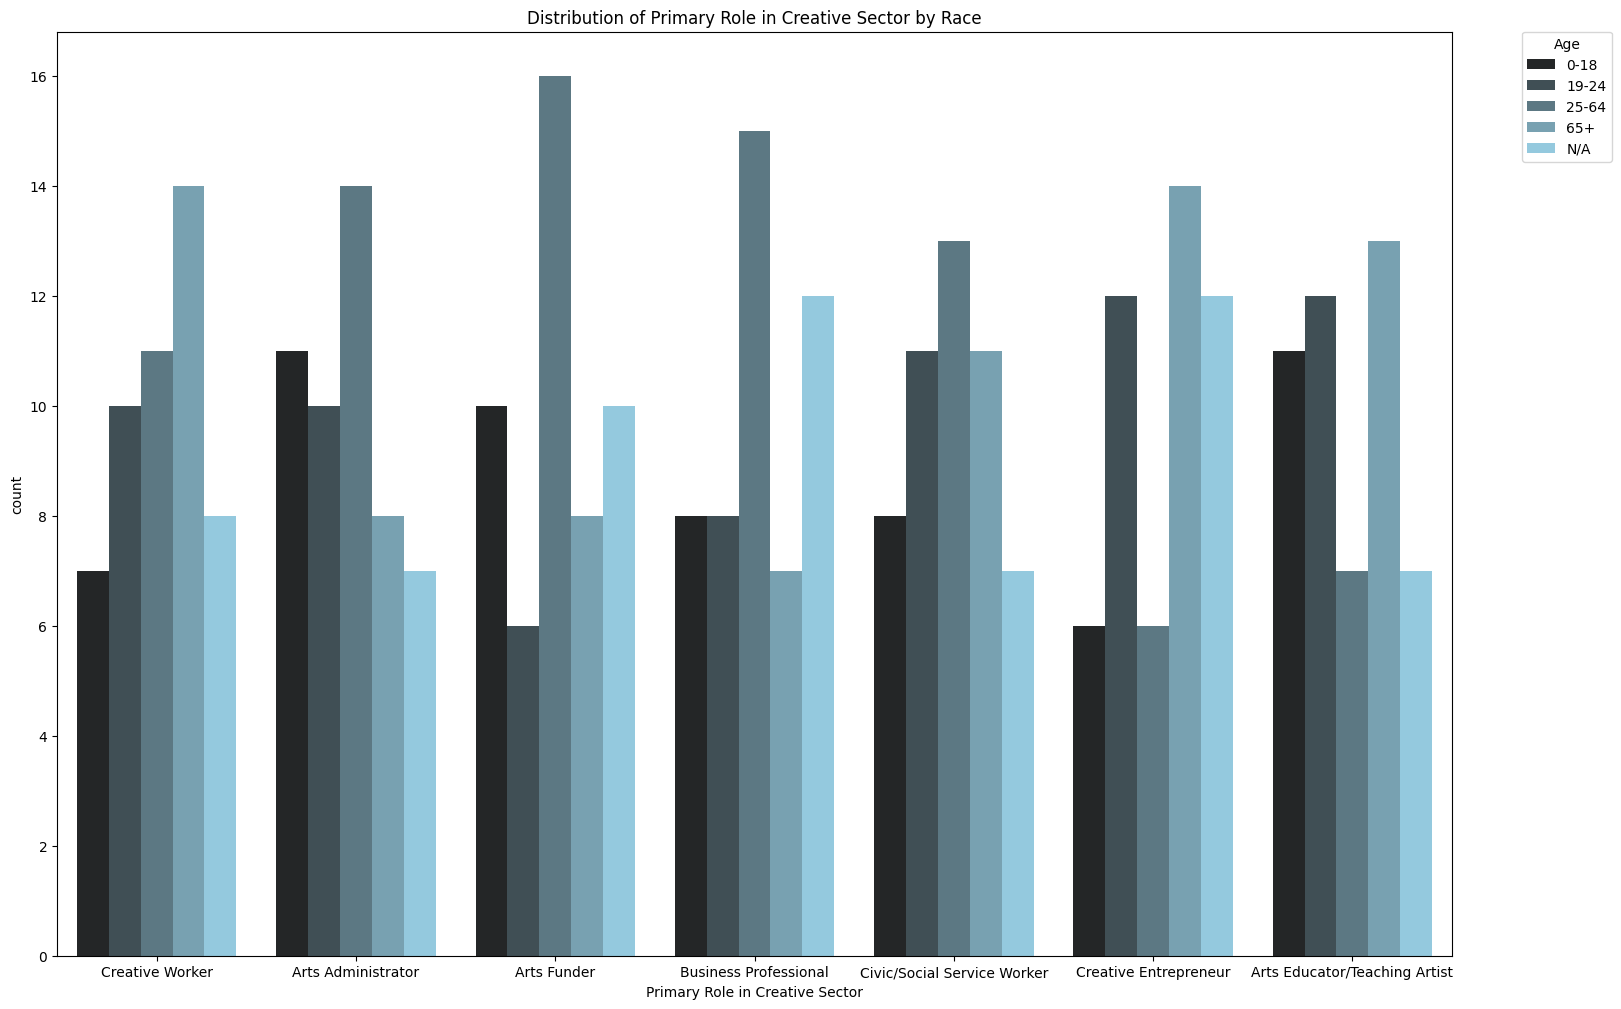

In [13]:
plt.figure(figsize=(18, 12))
plot = sns.countplot(data=df, x='Describe Your Primary Role in Creative Sector', orient='h', hue='Age', color='skyblue')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title('Age')
plt.title('Distribution of Primary Role in Creative Sector by Race')
plt.xlabel('Primary Role in Creative Sector')
plt.show()

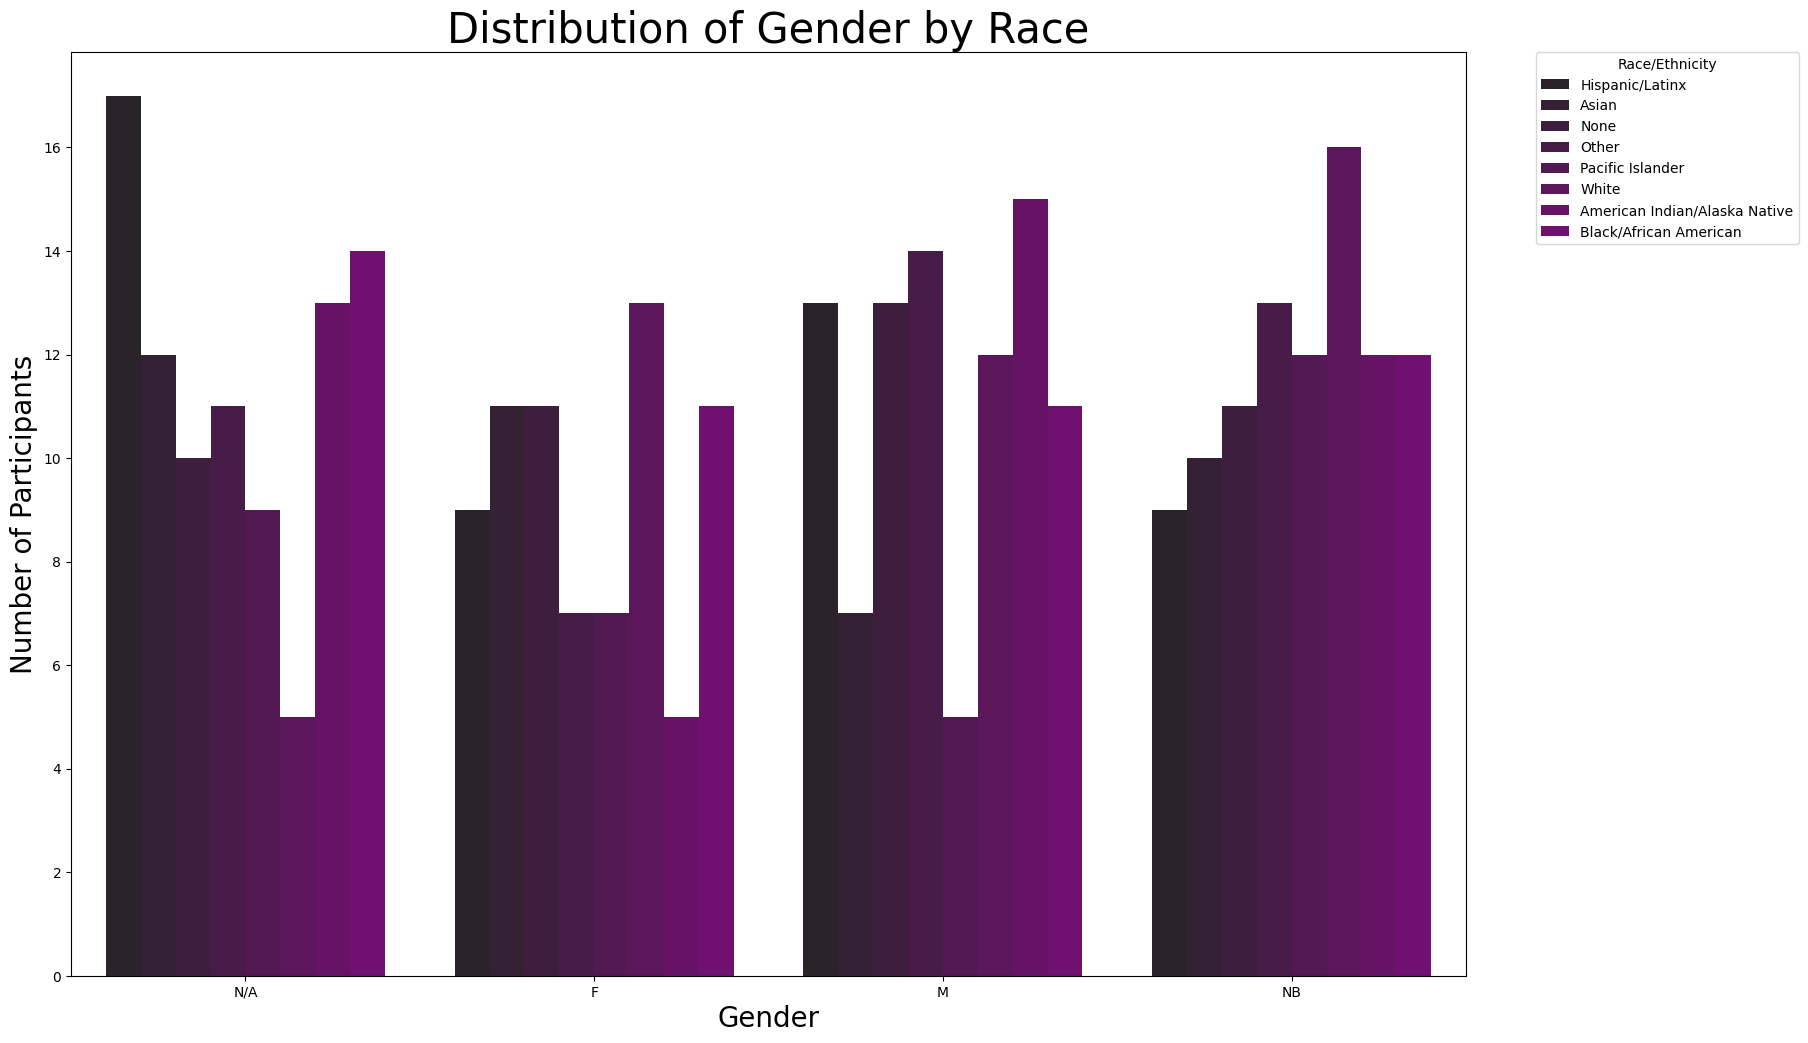

In [14]:
plt.figure(figsize=(18, 12))
plot = sns.countplot(data=df, x='Identified Gender', orient='h', hue='Select Your Race/Ethnicity', color='purple')
plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.).set_title('Race/Ethnicity')
plt.title('Distribution of Gender by Race', fontsize=30)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Number of Participants', fontsize=20)
plt.show()